# Kaggle Customer Satisfaction (Google Drive Mount)
https://www.kaggle.com/c/santander-customer-satisfaction
<br>
<br>
## Data Information
* Kaggle_Customer_Satisfaction.csv (76,020 * 371)
* TARGET : '0' (만족), '1' (불만)
* Metric : 'F1-Score', 'pos_lab = 1'

In [169]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'Kaggle_Customer_Satisfaction.zip' 파일을 구글드라이브에 업로드 후 진행

In [170]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* 마운트 결과 확인

In [171]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'

-rw------- 1 root root 4240457 Mar 15 04:04 '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'


# II. Data Preprocessing

> ## 1) Unzip 'Kaggle_Customer_Satisfaction.zip'

* Colab 파일시스템에 'Kaggle_Customer_Satisfaction.csv' 파일 생성

In [274]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Kaggle_Customer_Satisfaction.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip
replace Kaggle_Customer_Satisfaction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Kaggle_Customer_Satisfaction.csv  


* Kaggle_Customer_Satisfaction.csv 파일 확인

In [275]:
!ls -l

total 57980
drwx------ 5 root root     4096 Mar 15 05:27 drive
-rw-r--r-- 1 root root 59362806 Dec 11  2019 Kaggle_Customer_Satisfaction.csv
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [340]:
import pandas as pd

DF = pd.read_csv('Kaggle_Customer_Satisfaction.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [341]:
DF.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


* '0' (만족) TARGET과 '1' (불만) TARGET 개수

In [342]:
DF.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* '0' (만족) TARGET과 '1' (불만) TARGET 비율

In [343]:
(DF.TARGET.value_counts() / DF.shape[0]) * 100

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

> ## 3) 'var3' 이상치 전처리

In [344]:
DF.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

* 이상치 '-999999'를 최빈값 '2'로 대체

In [345]:
DF['var3'].replace(-999999, 2, inplace = True)

* 'ID' 컬럼 삭제

In [346]:
DF.drop('ID', axis = 1 , inplace = True)

> ## 4) train_test_split

* X (Input), y (Output) 지정

In [347]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((76020, 369), (76020,))

> ### (1) Without 'stratify'

In [348]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [349]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.081858
1     3.918142
Name: TARGET, dtype: float64
Test_Data : 
 0    95.952819
1     4.047181
Name: TARGET, dtype: float64


> ### (2) With 'Stratify'

In [350]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [351]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.042395
1     3.957605
Name: TARGET, dtype: float64
Test_Data : 
 0    96.0449
1     3.9551
Name: TARGET, dtype: float64


In [352]:
DF.shape

(76020, 370)

In [353]:
DF.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,0.023652,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,0.151962,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182.642532

# III. EDA

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import scipy.stats as stats
pearsonr_list = []
for column in DF.columns:
  if column == 'Target' : continue
  pearsonr_list.append([column, stats.pearsonr(DF[column], DF["TARGET"])[0]])
  print(f'{column} - Target 상관계수 : {stats.pearsonr(DF[column], DF["TARGET"])[0]}')

var3 - Target 상관계수 : -0.010564503554092566
var15 - Target 상관계수 : 0.10132209856071758
imp_ent_var16_ult1 - Target 상관계수 : -1.746025376654593e-05
imp_op_var39_comer_ult1 - Target 상관계수 : 0.010353129575421186
imp_op_var39_comer_ult3 - Target 상관계수 : 0.0035169224416889237
imp_op_var40_comer_ult1 - Target 상관계수 : 0.0031193869489660217
imp_op_var40_comer_ult3 - Target 상관계수 : -0.0003578690699808625
imp_op_var40_efect_ult1 - Target 상관계수 : 0.01922144928852631
imp_op_var40_efect_ult3 - Target 상관계수 : 0.019965206754798976
imp_op_var40_ult1 - Target 상관계수 : 0.0030872912147493665
imp_op_var41_comer_ult1 - Target 상관계수 : 0.010082404008577815
imp_op_var41_comer_ult3 - Target 상관계수 : 0.0038585869783329283
imp_op_var41_efect_ult1 - Target 상관계수 : 0.029478518122527567
imp_op_var41_efect_ult3 - Target 상관계수 : 0.02148588888138655
imp_op_var41_ult1 - Target 상관계수 : 0.02758646200026354
imp_op_var39_efect_ult1 - Target 상관계수 : 0.030380260916655757
imp_op_var39_efect_ult3 - Target 상관계수 : 0.022171691020253362
imp_op_var39

In [27]:
pearsonr_list.sort(key=lambda x: -x[1])
for i in range(len(pearsonr_list)):
  print(f'{pearsonr_list[i][0]} - Target 상관계수 : {pearsonr_list[i][1]}')

var15 - Target 상관계수 : 0.10132209856071758
ind_var8_0 - Target 상관계수 : 0.04666549435362044
num_var8_0 - Target 상관계수 : 0.04662218467931843
imp_op_var39_efect_ult1 - Target 상관계수 : 0.030380260916655757
imp_op_var41_efect_ult1 - Target 상관계수 : 0.029478518122527567
ind_var8 - Target 상관계수 : 0.027926030196465258
imp_op_var41_ult1 - Target 상관계수 : 0.02758646200026354
imp_op_var39_ult1 - Target 상관계수 : 0.027416443434902172
ind_var26_cte - Target 상관계수 : 0.023538027658766322
ind_var25_cte - Target 상관계수 : 0.02335070635769869
imp_op_var39_efect_ult3 - Target 상관계수 : 0.022171691020253362
imp_op_var41_efect_ult3 - Target 상관계수 : 0.02148588888138655
imp_op_var40_efect_ult3 - Target 상관계수 : 0.019965206754798976
ind_var25_0 - Target 상관계수 : 0.01949696384919717
ind_var25 - Target 상관계수 : 0.01949696384919717
imp_op_var40_efect_ult1 - Target 상관계수 : 0.01922144928852631
ind_var26_0 - Target 상관계수 : 0.0191039542413229
ind_var26 - Target 상관계수 : 0.0191039542413229
imp_op_var39_comer_ult1 - Target 상관계수 : 0.0103531295754211

* 'var15', 'ind_var8_0', 'num_var8_0', 'imp_op_var39_efect_ult1', 'imp_op_var41_efect_ult1'
* 이 다섯 feature가 Target과 상관관계가 높다

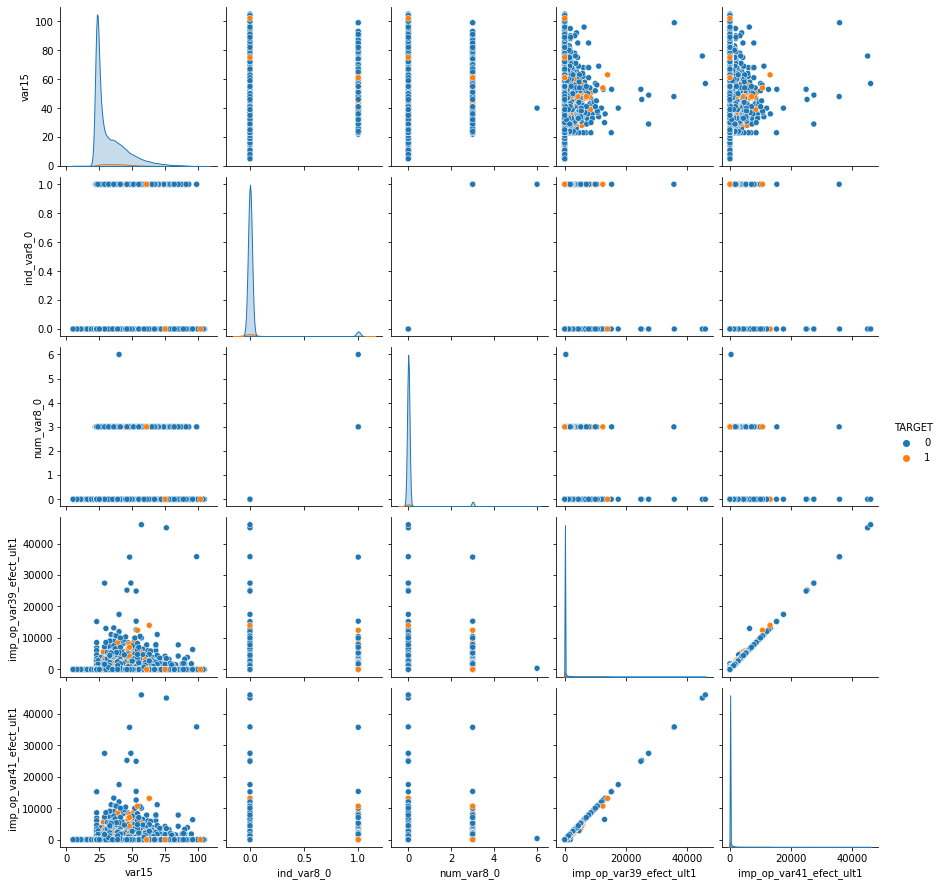

In [29]:
sns.pairplot(hue='TARGET', data=DF[['var15', 'ind_var8_0', 'num_var8_0', 'imp_op_var39_efect_ult1', 'imp_op_var41_efect_ult1', 'TARGET']])
plt.show()

# 분류 모델링

In [354]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

> ## 1) Decision Tree Classifier (With SMOTE)

In [369]:
from imblearn.over_sampling import SMOTE
OS = SMOTE(random_state = 2045)
X_train_OS, y_train_OS = OS.fit_sample(X_train, y_train)
X_train_OS.shape, y_train_OS.shape


((109518, 369), (109518,))

In [356]:
%%time
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini',
                            max_depth = 50)

DT.fit(X_train_OS, y_train_OS)

CPU times: user 4.99 s, sys: 667 µs, total: 4.99 s
Wall time: 5.01 s


In [357]:
confusion_matrix(y_test, DT.predict(X_test))

array([[20749,  1155],
       [  725,   177]])

In [358]:
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(precision_score(y_test, DT.predict(X_test), pos_label= 1), '\n')
DT_recall = recall_score(y_test, DT.predict(X_test), pos_label= 1)
DT_recall

0.9175655529246689 

0.13288288288288289 



0.19623059866962306

* F1_Score

In [367]:
from sklearn.metrics import f1_score
f1_score(y_test, DT.predict(X_test), average = None)

array([0.98245614, 0.6255144 ])

> ## 2) Random Forest Classifier

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57015, 369), (57015,), (19005, 369), (19005,))

In [360]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 700,
                            max_features = 4,
                            max_depth = 5,
                            random_state = 2045,
                            n_jobs = -1)
RF.fit(X_train, y_train)

CPU times: user 17.4 s, sys: 236 ms, total: 17.6 s
Wall time: 9.38 s


In [361]:
confusion_matrix(y_test, RF.predict(X_test))

array([[18253,     0],
       [  752,     0]])

In [362]:
print(accuracy_score(y_test, RF.predict(X_test)), '\n')
print(precision_score(y_test, RF.predict(X_test), pos_label= 1), '\n')
RF_recall = recall_score(y_test, RF.predict(X_test), pos_label= 1)
RF_recall

0.9604314654038411 

0.0 



0.0

* F1_Score

In [368]:
f1_score(y_test, RF.predict(X_test), average = None)

array([0.97981642, 0.        ])

> ## 2-1) Hyperparameter tunning

In [382]:
from sklearn.model_selection import GridSearchCV
RF_param_grid = {
    'max_depth': [None, 1, 5, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 4]
}

In [383]:
RF_grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), 
                              RF_param_grid, 
                              cv=3, 
                              return_train_score=True)

In [ ]:
RF_grid_search.fit(X_train, y_train)

In [ ]:
RF_grid_search.best_params_

In [ ]:
pred = RF_grid_search.best_estimator_.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, pred)


> ## 3) Gradient Boosting Machine Classifier

In [363]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 1000,
                                 learning_rate = 0.001,
                                 max_features = 4,
                                 max_depth = 5)
GBC.fit(X_train, y_train)

CPU times: user 22.6 s, sys: 117 ms, total: 22.7 s
Wall time: 22.8 s


In [364]:
confusion_matrix(y_test, GBC.predict(X_test))

array([[18253,     0],
       [  752,     0]])

In [365]:
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(precision_score(y_test, GBC.predict(X_test), pos_label= 1), '\n')
GBC_recall = recall_score(y_test, GBC.predict(X_test), pos_label= 1)
GBC_recall

0.9604314654038411 

0.0 



0.0

* F1_score

In [370]:
f1_score(y_test, GBC.predict(X_test), average = None)

array([0.97981642, 0.        ])